In [23]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import pandas_profiling
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [24]:
df = pd.read_csv('Patna-pirates.csv',index_col=0)

In [25]:
df.head()

,OVERALL,SEASON 7,SEASON 6,SEASON 5,SEASON 4,SEASON 3,SEASON 2,SEASON 1,Team-name
SEASONS,,,,,,,,,
MATCHES PLAYED,129.0,17.0,22.0,26.0,16.0,16.0,16.0,16.0,patna-pirates
WINS,68.0,6.0,9.0,14.0,12.0,12.0,7.0,8.0,patna-pirates
DRAWS,13.0,1.0,2.0,5.0,0.0,2.0,1.0,2.0,patna-pirates
LOSSES,48.0,10.0,11.0,7.0,4.0,2.0,8.0,6.0,patna-pirates
FINISHING POSITION,0.0,8.0,4.0,2.0,1.0,2.0,4.0,4.0,patna-pirates


In [26]:
df1 = df.transpose()

In [27]:
df2 = df1.apply(pd.to_numeric, errors='coerce')

In [28]:
df2

SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,FINISHING POSITION,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,...,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS
OVERALL,129.0,68.0,13.0,48.0,0.0,5559.0,2025.0,1206.0,2328.0,0.46,...,504.0,2579.0,3069.0,1165.0,1904.0,0.42,130.0,191.0,382.0,1291.0
SEASON 7,17.0,6.0,1.0,10.0,8.0,718.0,250.0,168.0,300.0,0.44,...,56.0,314.0,396.0,157.0,239.0,0.45,22.0,26.0,52.0,179.0
SEASON 6,22.0,9.0,2.0,11.0,4.0,934.0,406.0,226.0,302.0,0.53,...,120.0,496.0,555.0,186.0,369.0,0.36,16.0,30.0,60.0,201.0
SEASON 5,26.0,14.0,5.0,7.0,2.0,1173.0,487.0,238.0,448.0,0.54,...,129.0,637.0,625.0,226.0,399.0,0.40,27.0,55.0,110.0,252.0
SEASON 4,16.0,12.0,0.0,4.0,1.0,692.0,206.0,152.0,334.0,0.38,...,40.0,264.0,332.0,145.0,187.0,0.52,27.0,19.0,38.0,171.0
SEASON 3,16.0,12.0,2.0,2.0,2.0,703.0,241.0,129.0,333.0,0.46,...,52.0,324.0,405.0,175.0,230.0,0.45,7.0,30.0,60.0,182.0
SEASON 2,16.0,7.0,1.0,8.0,4.0,701.0,182.0,159.0,360.0,0.33,...,43.0,228.0,376.0,152.0,224.0,0.44,13.0,13.0,26.0,164.0
SEASON 1,16.0,8.0,2.0,6.0,4.0,638.0,253.0,134.0,251.0,0.50,...,64.0,316.0,380.0,124.0,256.0,0.37,18.0,18.0,36.0,142.0
Team-name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df2['WIN%'] = df2['WINS']/df2['MATCHES PLAYED']
df2['DRAW%'] = df2['DRAWS']/df2['MATCHES PLAYED']
df2['LOSS%'] = df2['LOSSES']/df2['MATCHES PLAYED']
df2['WIN-LOSS%'] = df2['WINS']/df2['LOSSES']

In [30]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
dtype: object

In [31]:
df2['UNSUCCESSFUL RAID%'] = df2['UNSUCCESSFUL RAID']/df2['TOTAL RAIDS']
df2['EMPTY RAID%'] = df2['EMPTY RAIDS']/df2['TOTAL RAIDS']
df2['AVG_RAID_TOUCH_POINT'] = df2['RAID TOUCH POINTS']/df2['MATCHES PLAYED']
df2['AVG_RAID_BONUS_POINT'] = df2['RAID BONUS POINTS']/df2['MATCHES PLAYED']
df2['UNSUCCESSFUL TACKLE%'] = df2['UNSUCCESFUL TACKLES']/df2['TOTAL TACKLES']
df2['AVG_ALL_OUTS'] = df2['ALL OUTS INFLICTED']/df2['MATCHES PLAYED']

In [32]:
df6 = df2.drop(['MATCHES PLAYED','WINS','DRAWS','LOSSES','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS','NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS'],axis=1)

In [33]:
df6 = df6.drop(['Team-name'],axis=0)
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5559.0,0.46,0.42,130.0,1291.0,0.527132,0.100775,0.372093,1.416667,0.216945,0.418780,16.085271,3.906977,0.620398,1.480620
SEASON 7,8.0,718.0,0.44,0.45,22.0,179.0,0.352941,0.058824,0.588235,0.600000,0.233983,0.417827,15.176471,3.294118,0.603535,1.529412
SEASON 6,4.0,934.0,0.53,0.36,16.0,201.0,0.409091,0.090909,0.500000,0.818182,0.241970,0.323340,17.090909,5.454545,0.664865,1.363636
SEASON 5,2.0,1173.0,0.54,0.40,27.0,252.0,0.538462,0.192308,0.269231,2.000000,0.202899,0.381927,19.538462,4.961538,0.638400,2.115385
SEASON 4,1.0,692.0,0.38,0.52,27.0,171.0,0.750000,0.000000,0.250000,3.000000,0.219653,0.482659,14.000000,2.500000,0.563253,1.187500
SEASON 3,2.0,703.0,0.46,0.45,7.0,182.0,0.750000,0.125000,0.125000,6.000000,0.183499,0.473684,17.000000,3.250000,0.567901,1.875000
SEASON 2,4.0,701.0,0.33,0.44,13.0,164.0,0.437500,0.062500,0.500000,0.875000,0.226819,0.513552,11.562500,2.687500,0.595745,0.812500
SEASON 1,4.0,638.0,0.50,0.37,18.0,142.0,0.500000,0.125000,0.375000,1.333333,0.210031,0.393417,15.750000,4.000000,0.673684,1.125000


In [34]:
df6.dtypes

SEASONS
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESS RAID %          float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64
dtype: object

In [35]:
df6.corr().iplot(kind='heatmap',colorscale='ylgn')

In [36]:
df3= df2.loc['SEASON 5',:]

In [37]:
df3 

SEASONS
MATCHES PLAYED            26.000000
WINS                      14.000000
DRAWS                      5.000000
LOSSES                     7.000000
FINISHING POSITION         2.000000
TOTAL RAIDS             1173.000000
SUCCESSFUL RAIDS         487.000000
UNSUCCESSFUL RAID        238.000000
EMPTY RAIDS              448.000000
SUCCESS RAID %             0.540000
NO. OF SUPER RAIDS        26.000000
RAID TOUCH POINTS        508.000000
RAID BONUS POINTS        129.000000
TOTAL RAID POINTS        637.000000
TOTAL TACKLES            625.000000
SUCCESSFUL TACKLES       226.000000
UNSUCCESFUL TACKLES      399.000000
SUCCESSFUL TACKLE %        0.400000
NO. OF SUPER TACKLES      27.000000
ALL OUTS INFLICTED        55.000000
TOTAL ALL OUT POINTS     110.000000
TOTAL DEFENCE POINTS     252.000000
WIN%                       0.538462
DRAW%                      0.192308
LOSS%                      0.269231
WIN-LOSS%                  2.000000
UNSUCCESSFUL RAID%         0.202899
EMPTY RAID%         

In [38]:
df3.iplot(kind='bar')

In [39]:
df4 =df6.drop('FINISHING POSITION',axis=1)
df4 =df4.drop(['SEASON 7'])
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5559.0,0.46,0.42,130.0,1291.0,0.527132,0.100775,0.372093,1.416667,0.216945,0.418780,16.085271,3.906977,0.620398,1.480620
SEASON 6,934.0,0.53,0.36,16.0,201.0,0.409091,0.090909,0.500000,0.818182,0.241970,0.323340,17.090909,5.454545,0.664865,1.363636
SEASON 5,1173.0,0.54,0.40,27.0,252.0,0.538462,0.192308,0.269231,2.000000,0.202899,0.381927,19.538462,4.961538,0.638400,2.115385
SEASON 4,692.0,0.38,0.52,27.0,171.0,0.750000,0.000000,0.250000,3.000000,0.219653,0.482659,14.000000,2.500000,0.563253,1.187500
SEASON 3,703.0,0.46,0.45,7.0,182.0,0.750000,0.125000,0.125000,6.000000,0.183499,0.473684,17.000000,3.250000,0.567901,1.875000
SEASON 2,701.0,0.33,0.44,13.0,164.0,0.437500,0.062500,0.500000,0.875000,0.226819,0.513552,11.562500,2.687500,0.595745,0.812500
SEASON 1,638.0,0.50,0.37,18.0,142.0,0.500000,0.125000,0.375000,1.333333,0.210031,0.393417,15.750000,4.000000,0.673684,1.125000


In [40]:
df5 = df6['FINISHING POSITION']
df5 = df5.drop(['SEASON 7'],axis=0)
#df5['FINISHING POSITION'] = df['FINISHING POSITION'].fillna(0)
df5

OVERALL     0.0
SEASON 6    4.0
SEASON 5    2.0
SEASON 4    1.0
SEASON 3    2.0
SEASON 2    4.0
SEASON 1    4.0
Name: FINISHING POSITION, dtype: float64

In [41]:
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5559.0,0.46,0.42,130.0,1291.0,0.527132,0.100775,0.372093,1.416667,0.216945,0.418780,16.085271,3.906977,0.620398,1.480620
SEASON 6,934.0,0.53,0.36,16.0,201.0,0.409091,0.090909,0.500000,0.818182,0.241970,0.323340,17.090909,5.454545,0.664865,1.363636
SEASON 5,1173.0,0.54,0.40,27.0,252.0,0.538462,0.192308,0.269231,2.000000,0.202899,0.381927,19.538462,4.961538,0.638400,2.115385
SEASON 4,692.0,0.38,0.52,27.0,171.0,0.750000,0.000000,0.250000,3.000000,0.219653,0.482659,14.000000,2.500000,0.563253,1.187500
SEASON 3,703.0,0.46,0.45,7.0,182.0,0.750000,0.125000,0.125000,6.000000,0.183499,0.473684,17.000000,3.250000,0.567901,1.875000
SEASON 2,701.0,0.33,0.44,13.0,164.0,0.437500,0.062500,0.500000,0.875000,0.226819,0.513552,11.562500,2.687500,0.595745,0.812500
SEASON 1,638.0,0.50,0.37,18.0,142.0,0.500000,0.125000,0.375000,1.333333,0.210031,0.393417,15.750000,4.000000,0.673684,1.125000


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = df4
y= df5
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(7, 8)

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FEATURES','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                FEATURES         Score
0            TOTAL RAIDS  13065.621667
4   TOTAL DEFENCE POINTS   3061.203496
3   NO. OF SUPER TACKLES    319.156863
8              WIN-LOSS%      5.434735
11  AVG_RAID_TOUCH_POINT      1.165291


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[0.0245098  0.03088235 0.10754902 0.13117647 0.11235294 0.10254902
 0.08784314 0.03637255 0.03843137 0.06176471 0.         0.0754902
 0.02058824 0.04460784 0.12588235]


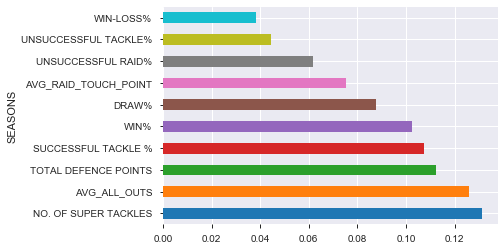

In [44]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [45]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%',
       'DRAW%', 'LOSS%', 'WIN-LOSS%', 'UNSUCCESSFUL RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS'],
      dtype='object')


In [46]:
X_features = df4.filter(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%',
       'DRAW%', 'LOSS%', 'WIN-LOSS%', 'UNSUCCESSFUL RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS'],axis=1)
X_features.shape

(7, 12)

In [31]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks


Using Theano backend.



You can find the C code in this temporary file: C:\Users\ANINDA~1.BHA\AppData\Local\Temp\theano_compilation_error_o77uqnk7


Exception: Compilation failed (return status=1): C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `_import_array':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1470: undefined reference to `__imp_PyExc_ImportError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1476: undefined reference to `__imp_PyExc_AttributeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1481: undefined reference to `__imp_PyCapsule_Type'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1482: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1497: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1505: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1511: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1521: undefined reference to `__imp_PyExc_RuntimeError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o:D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1533: more undefined references to `__imp_PyExc_RuntimeError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `NpyCapsule_Check':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/npy_3kcompat.h:468: undefined reference to `__imp_PyCapsule_Type'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `unpack_list_of_ssize_t':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:48: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:58: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:352: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:370: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:385: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:389: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:393: more undefined references to `__imp_PyExc_IndexError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:405: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:420: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:426: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:440: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:444: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `c_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `lazy_rec_eval':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:618: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:641: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:649: undefined reference to `__imp_PyExc_ValueError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:657: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:708: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:715: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:721: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:772: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:814: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:826: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:840: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:850: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:894: undefined reference to `__imp_PyExc_AssertionError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:938: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_set_allow_gc':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:973: undefined reference to `__imp_PyBool_Type'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:976: undefined reference to `__imp__Py_TrueStruct'. collect2.exe: error: ld returned 1 exit status. 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_features, y, epochs=150, batch_size=10)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_features, y)
print('Accuracy: %.2f' % (accuracy*100))

In [47]:
f_select = ['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%',
       'DRAW%', 'LOSS%', 'WIN-LOSS%', 'UNSUCCESSFUL RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS']
f_select

['SUCCESS RAID %',
 'SUCCESSFUL TACKLE %',
 'NO. OF SUPER TACKLES',
 'WIN%',
 'DRAW%',
 'LOSS%',
 'WIN-LOSS%',
 'UNSUCCESSFUL RAID%',
 'AVG_RAID_TOUCH_POINT',
 'AVG_RAID_BONUS_POINT',
 'UNSUCCESSFUL TACKLE%',
 'AVG_ALL_OUTS']

In [48]:
#Using PCA to transform and decouple the dataset defined by the selected features
from sklearn.decomposition import PCA
pca = PCA()  
XX = pca.fit_transform(X[f_select]) # XX is out new training matrix that has two basis vectors
XX

array([[ 9.60031203e+01,  1.55753735e-01,  2.33046828e-01,
         8.99006026e-02, -8.69480774e-03, -1.15003334e-02,
         5.70592728e-15],
       [-1.79764756e+01, -1.37528488e+00, -2.21016647e+00,
         4.81081952e-01,  1.30610480e-02,  5.54945542e-02,
         5.70592728e-15],
       [-6.97915597e+00, -3.80972986e+00, -9.66992629e-01,
        -4.38949517e-01, -1.18166320e-01,  1.94385109e-03,
         5.70592728e-15],
       [-7.01818349e+00,  1.96856578e+00,  1.32339782e+00,
        -2.66794801e-01,  1.00706526e-01,  9.71874341e-02,
         5.70592728e-15],
       [-2.70335413e+01, -1.77544289e+00,  3.35871149e+00,
         2.52732092e-01, -3.28000999e-02, -3.18570257e-02,
         5.70592728e-15],
       [-2.10055116e+01,  4.60873535e+00, -6.86242594e-01,
        -5.45847952e-03, -1.59262804e-01, -3.12826831e-02,
         5.70592728e-15],
       [-1.59902524e+01,  2.27402763e-01, -1.05175445e+00,
        -1.12511849e-01,  2.05156457e-01, -7.99857973e-02,
         5.7059272

In [49]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [50]:
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5559.0,0.46,0.42,130.0,1291.0,0.527132,0.100775,0.372093,1.416667,0.216945,0.418780,16.085271,3.906977,0.620398,1.480620
SEASON 7,8.0,718.0,0.44,0.45,22.0,179.0,0.352941,0.058824,0.588235,0.600000,0.233983,0.417827,15.176471,3.294118,0.603535,1.529412
SEASON 6,4.0,934.0,0.53,0.36,16.0,201.0,0.409091,0.090909,0.500000,0.818182,0.241970,0.323340,17.090909,5.454545,0.664865,1.363636
SEASON 5,2.0,1173.0,0.54,0.40,27.0,252.0,0.538462,0.192308,0.269231,2.000000,0.202899,0.381927,19.538462,4.961538,0.638400,2.115385
SEASON 4,1.0,692.0,0.38,0.52,27.0,171.0,0.750000,0.000000,0.250000,3.000000,0.219653,0.482659,14.000000,2.500000,0.563253,1.187500
SEASON 3,2.0,703.0,0.46,0.45,7.0,182.0,0.750000,0.125000,0.125000,6.000000,0.183499,0.473684,17.000000,3.250000,0.567901,1.875000
SEASON 2,4.0,701.0,0.33,0.44,13.0,164.0,0.437500,0.062500,0.500000,0.875000,0.226819,0.513552,11.562500,2.687500,0.595745,0.812500
SEASON 1,4.0,638.0,0.50,0.37,18.0,142.0,0.500000,0.125000,0.375000,1.333333,0.210031,0.393417,15.750000,4.000000,0.673684,1.125000


In [51]:
X_train = X
y_train =y 
X_test = df6.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)
X_test = X_test.drop(['FINISHING POSITION'], axis=1)
y_test = df6['FINISHING POSITION']
y_test = y_test.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)

In [52]:
X_test

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
SEASON 7,718.0,0.44,0.45,22.0,179.0,0.352941,0.058824,0.588235,0.6,0.233983,0.417827,15.176471,3.294118,0.603535,1.529412


In [53]:
y_test

SEASON 7    8.0
Name: FINISHING POSITION, dtype: float64

In [54]:
# machine learning
from sklearn.svm import SVC
from sklearn import preprocessing
#import fancyimpute
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#  Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Models
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [55]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[17:06:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.26584	validation_1-rmse:7.26
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:2.09855	validation_1-rmse:7.0155
[2]	validation_0-rmse:1.94368	validation_1-rmse:6.78934
[3]	validation_0-rmse:1.80031	validation_1-rmse:6.58014
[4]	validation_0-rmse:1.66758	validation_1-rmse:6.38663
[5]	validation_0-rmse:1.5447	validation_1-rmse:6.20763
[6]	validation_0-rmse:1.43095	validation_1-rmse:6.04206
[7]	validation_0-rmse:1.32563	validation_1-rmse:5.8889
[8]	validation_0-rmse:1.22813	validation_1-rmse:5.74723
[9]	validation_0-rmse:1.13789	validation_1-rmse:5.61619
[10]	validation_0-rmse:1.05428	validation_1-rmse:5.49498
[11]	validation_0-rmse:0.976878	validation_1-rmse:5.38286
[12]	val

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[67]	validation_0-rmse:0.014425	validation_1-rmse:4.20874
[68]	validation_0-rmse:0.01342	validation_1-rmse:4.2084
[69]	validation_0-rmse:0.012481	validation_1-rmse:4.20707
[70]	validation_0-rmse:0.011611	validation_1-rmse:4.20585
[71]	validation_0-rmse:0.010803	validation_1-rmse:4.20472
[72]	validation_0-rmse:0.010056	validation_1-rmse:4.20367
[73]	validation_0-rmse:0.009364	validation_1-rmse:4.20283
[74]	validation_0-rmse:0.008719	validation_1-rmse:4.20193
[75]	validation_0-rmse:0.008118	validation_1-rmse:4.20109
[76]	validation_0-rmse:0.007561	validation_1-rmse:4.20031
[77]	validation_0-rmse:0.007046	validation_1-rmse:4.19959
[78]	validation_0-rmse:0.006566	validation_1-rmse:4.19893
[79]	validation_0-rmse:0.00612	validation_1-rmse:4.19832
[80]	validation_0-rmse:0.005708	validation_1-rmse:4.19775
[81]	validation_0-rmse:0.005325	validation_1-rmse:4.1973
[82]	validation_0-rmse:0.004969	validation_1-rmse:4.1968
[83]	validation_0-rmse:0.004639	validation_1-rmse:4.19635
[84]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [56]:
pred  = pd.DataFrame()
pred['MW_Prediction'] = reg.predict(X_test)


In [57]:
pred['MW_Prediction']

0    3.808376
Name: MW_Prediction, dtype: float32

In [58]:
predict = reg.predict(X_test)
predictions = [round(value) for value in predict]
predictions

[4.0]

## Finding the win-loss% of a team for Season 7

In [59]:
df6.loc['SEASON 7','WIN-LOSS%']

0.6

## Finding the successful Raid %(successful raid/ total raid) for season 7

In [60]:
SUCC_RAID =df2.loc['SEASON 7','SUCCESSFUL RAIDS']
TOT_RAID = df2.loc['SEASON 7','TOTAL RAIDS']

SUCC_RAID_PERC = SUCC_RAID/TOT_RAID
SUCC_RAID_PERC

0.34818941504178275

## Finding the OVERALL successful Raid %(successful raid/ total raid) of a team

In [62]:
SUCC_RAID_OV =df2.loc['OVERALL','SUCCESSFUL RAIDS']
TOT_RAID_OV = df2.loc['OVERALL','TOTAL RAIDS']

SUCC_RAID_PERC_OV = SUCC_RAID_OV/TOT_RAID_OV
SUCC_RAID_PERC_OV

0.36427415002698327

## Finding the Super-performance total of the team

In [63]:
SUPER_RAIDS = df2.loc['SEASON 7','NO. OF SUPER RAIDS']
SUPER_TACKLES = df2.loc['SEASON 7','NO. OF SUPER TACKLES']
All_OUTS_INFLICTED = df2.loc['SEASON 7','ALL OUTS INFLICTED']
All_OUTS_CONCEDED = 23

SPT = SUPER_RAIDS+SUPER_TACKLES+All_OUTS_INFLICTED-All_OUTS_CONCEDED
SPT

36.0